#Importing libraries, dataset creation, generation of thresholds and probabilities

In [2]:
!pip install import-ipynb

import import_ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Universit/DQ/PROJECT

from b_completeness import simulateMCAR, simulateMNARAllMatrix, simulateMCAROneColumn, simulateMNAROneColumn
from A_Data_Collection import make_dataset_for_regression
from D_Data_Analysis import regression
from E_Plot_Results import plot

from sklearn import linear_model
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor

# DEFAULT PARAMETERS FOR CLASSIFICATION, REGRESSION & CLUSTERING
# N.B. CAN BE CHANGED ACCORDING TO THE ASSIGNMENT GUIDELINES & THE DATA QUALITY ISSUE TO BE INJECTED
#X, y = make_dataset_for_classification(n_samples=1000, n_features=5, n_informative=5, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, seed=2023)
#X, y = make_dataset_for_regression(n_samples=1000, n_features=3, n_informative=3, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, seed=2023)
#X = make_dataset_for_clustering(n_samples=1000, n_features=4, centers=2, cluster_std=1.0, center_box=(-10.0, 10.0), seed=2023)

# LIST OF ALGORITHMS FOR CLASSIFICATION, REGRESSION & CLUSTERING

    # A: DATA COLLECTION
    # X, y = make_dataset_for_classification(+ parameters)
    # X, y = make_dataset_for_regression(+ parameters)
    # X = make_dataset_for_clustering(+ parameters)

    # B: DATA POLLUTION
    # YOUR POLLUTION FUNCTION (on the generated datasets)

    # D: DATA ANALYSIS
    #for algorithm in CLASSIFICATION/REGRESSION/CLUSTERING_ALGORITHMS:
        #results_1_analysis = classification(X, y, algorithm, SEED)
        #results_1_analysis = regression(X, y, algorithm, SEED)
        #results_1_analysis = clustering(X, algorithm, n_clusters, SEED)

    # C: DATA PREPARATION (IF REQUESTED, IT DEPENDS ON THE DQ ISSUE)
    # YOUR DATA PREPARATION FUNCTION (to apply on the generated datasets)

    # D: DATA ANALYSIS ON THE CLEANED DATASETS (re-compute the data analysis evaluation on prepared dataset)
    #for algorithm in CLASSIFICATION/REGRESSION/CLUSTERING_ALGORITHMS:
        #results_2_analysis = classification(X, y, algorithm, SEED):
        #results_2_analysis = regression(X, y, algorithm, SEED)
        #results_2_analysis = clustering(X, algorithm, n_clusters, SEED)

    # E: PLOT RESULTS
    # N.B. IF YOU WANT TO SAVE THE PLOT OR CHANGE THE y_lim THE INSTRUCTIONS ARE INSIDE THE E_plot results
    # plot(x_axis_values, x_label, results, title, algorithms, plot_type)
    # WHERE plot_type = "performance" ("distance train-test" only for classification/regression) "speed"
    # ADD TABLES WITH THE RESULTS!

    # ------------------------------------------------------------------------------------------------------




Mounted at /gdrive
/gdrive/MyDrive/Universit/DQ/PROJECT
importing Jupyter notebook from A_Data_Collection.ipynb
importing Jupyter notebook from D_Data_Analysis.ipynb
importing Jupyter notebook from E_Plot_Results.ipynb


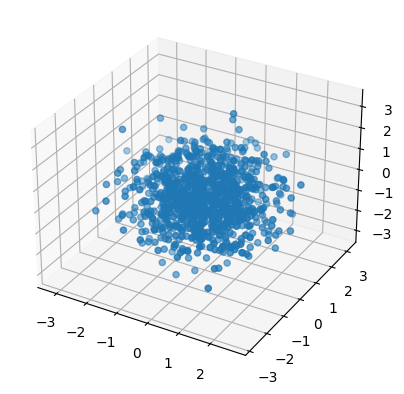

In [3]:
REGRESSION_ALGORITHMS = ["LinearRegressor","BayesianRidge","SVMRegressor","KNNRegressor", "MLPRegressor", "GPRegressor"]
#REGRESSION_ALGORITHMS = ["LinearRegressor","SVMRegressor","KNNRegressor"]
SEED = 2023

# Generating different probability
probs1 = np.linspace(0.0, 0.5, 10,endpoint=False)
probs2 = np.linspace(0.5, 1.0, 10, endpoint=False)
probs3 = np.linspace(0.0, 1.0, 10, endpoint=False)
probs4 = np.linspace(0.0, 0.3, 10, endpoint = False)

X, y = make_dataset_for_regression(n_samples=1000, n_features=3, n_informative=3, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, seed=SEED)


# Here we plot the dataset on a 3d-plane, each axis corresponding to one of the feature
# We want to know how the samples are distributed in the space
feat_1 = X[:,0]
feat_2 = X[:,1]
feat_3 = X[:,2]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(feat_1, feat_2, feat_3)
plt.show()

# Generating thresholds, we take values in the percentiles from 0 to 90
all = []
all.append(feat_1)
all.append(feat_2)
all.append(feat_3)
all = np.array(all)
all = all.flatten()
all = np.sort(all)
step = int(all.size / 10)

random_thresholds = []
random_thresholds = np.array(random_thresholds)

# Here we generate random thresholds, picking random values from those in the
# features' columns
for i in range(0, 10):
  random_thresholds = np.append(random_thresholds, np.random.choice(all))

random_thresholds = np.sort(random_thresholds)

percentile_thresholds = []
percentile_thresholds = np.array(percentile_thresholds)
for i in range(0, all.size, step):
  percentile_thresholds = np.append(percentile_thresholds, all[i])

# Results with the complete dataset

#Experiments

## 1st Experiment
MNAR simulation with double iteration over

probabilities: probs1

thresholds: percentile_thresholds

### Error injection

Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Tra

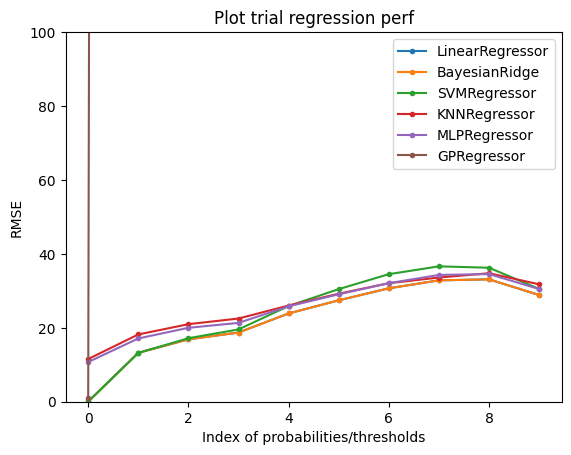

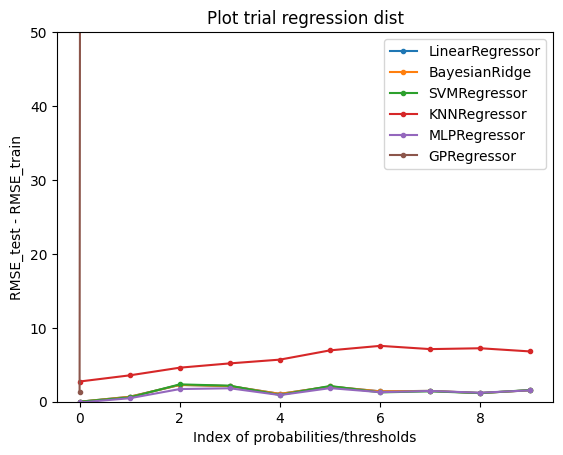

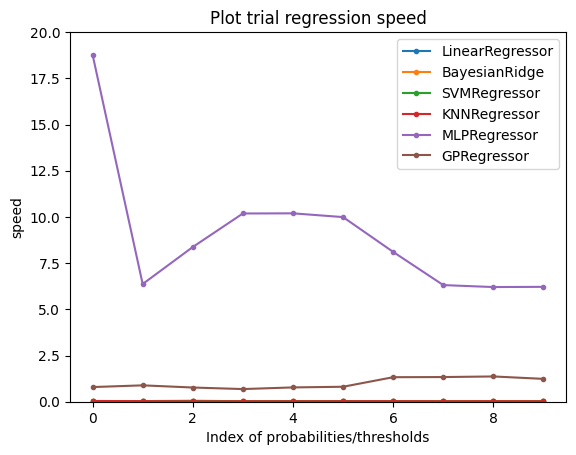

In [ ]:
results_for_each_algorithm = []
created_datasets = []
# 1st Experiment MNAR
#Simulazione MNAR treshold e probabilità mischiate, probabilità 1, soglie giuste
count = 0;
for algorithm in REGRESSION_ALGORITHMS:  # FIRST CICLE ON THE ALGORITHMS

        results_single_algorithm = []

        #MNAR simulations
        for i in range(len(probs1)):
          mnar = simulateMNARAllMatrix(X, percentile_thresholds[i], probs1[i])
          results_2_analysis = regression(mnar, y, algorithm, SEED)
          results_single_algorithm.append(results_2_analysis)
          if (count < 1):
            created_datasets.append(mnar)

        results_for_each_algorithm.append(results_single_algorithm)
        count = 1

    # RESULTS EVALUATION
    # EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS

plot(x_axis_values=np.linspace(0, 9, 10), x_label="Index of probabilities/thresholds", results=results_for_each_algorithm,title="Plot trial regression perf", algorithms=REGRESSION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=np.linspace(0, 9, 10), x_label="Index of probabilities/thresholds", results=results_for_each_algorithm,title="Plot trial regression dist", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=np.linspace(0, 9, 10), x_label="Index of probabilities/thresholds", results=results_for_each_algorithm,title="Plot trial regression speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed")

### Data Imputation

Simple imputation, fill NaN with a standard value (0 in this example)

In [ ]:
# First we convert the dataset from ndarray to dataframes
dataframes = []
for df in created_datasets:
  dataframes.append(pd.DataFrame(df))


In [ ]:
# Fill NaN with a standard value (0)
for df in dataframes:
  df.fillna(0, inplace=True)


Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Tra

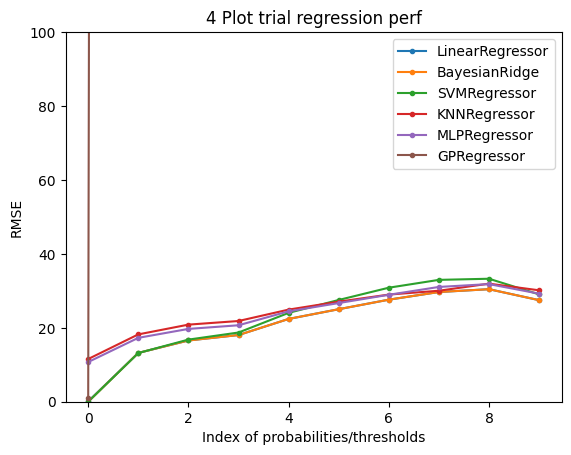

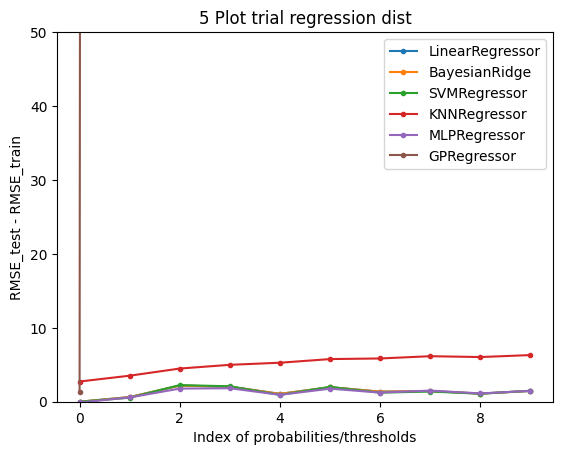

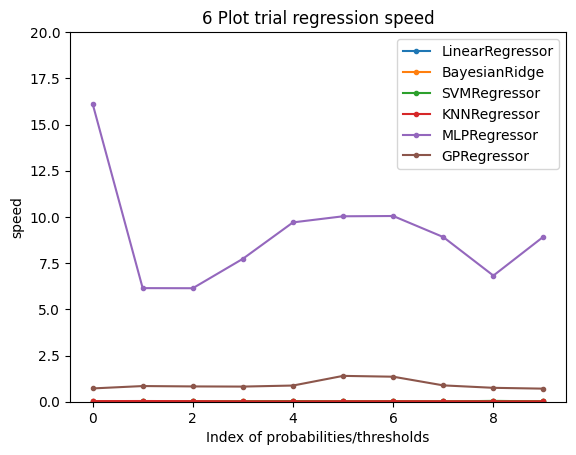

In [ ]:
# Regression and results
full=[]
for df in dataframes:
  full.append(df.to_numpy())

results_for_each_algorithm = []

for algorithm in REGRESSION_ALGORITHMS:  # FIRST CICLE ON THE ALGORITHMS

        results_single_algorithm = []

        for dd in full:
          results_2_analysis = regression(dd, y, algorithm, SEED)
          results_single_algorithm.append(results_2_analysis)

        results_for_each_algorithm.append(results_single_algorithm)

    # RESULTS EVALUATION
    # EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=np.linspace(0, 9, 10), x_label="Index of probabilities/thresholds", results=results_for_each_algorithm,title="4 Plot trial regression perf", algorithms=REGRESSION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=np.linspace(0, 9, 10), x_label="Index of probabilities/thresholds", results=results_for_each_algorithm,title="5 Plot trial regression dist", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=np.linspace(0, 9, 10), x_label="Index of probabilities/thresholds", results=results_for_each_algorithm,title="6 Plot trial regression speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed")

## 2nd Experiment
MCAR simulation with iteration over

probabilities: probs1

### Error Injection

Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Tra

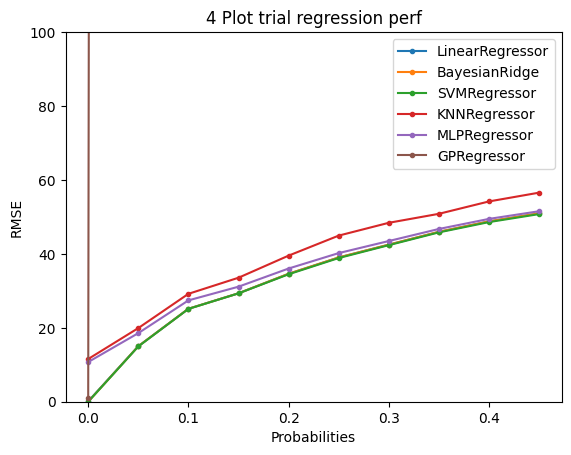

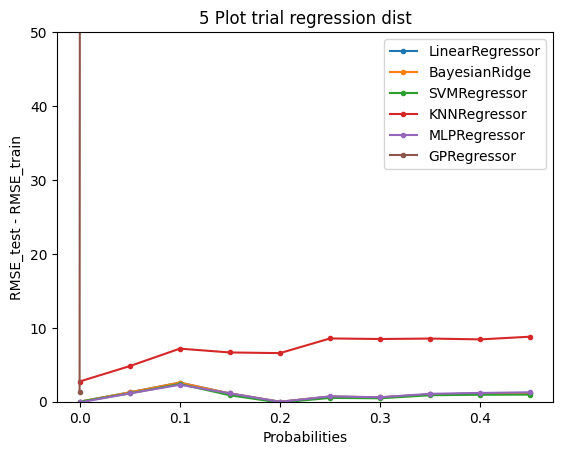

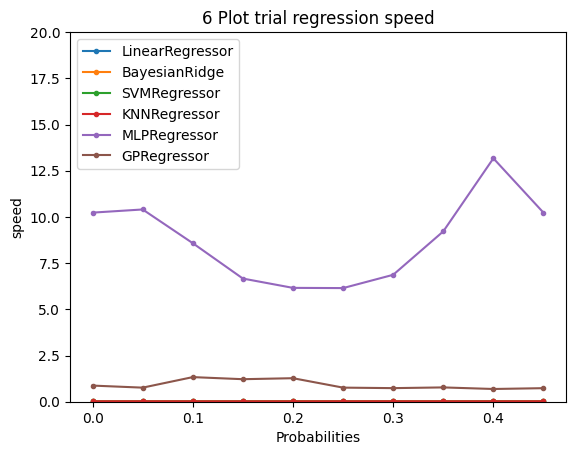

In [ ]:
results_for_each_algorithm = []
created_datasets = []
#MCAR simulation probs 1
for algorithm in REGRESSION_ALGORITHMS:  # FIRST CICLE ON THE ALGORITHMS

        results_single_algorithm = []

        for i in range(len(probs1)):
          mcar = simulateMCAR(X, probs1[i])
          if (algorithm == "LinearRegressor"):
            created_datasets.append(mcar)
          results_1_analysis = regression(mcar, y, algorithm, SEED)
          results_single_algorithm.append(results_1_analysis)

        results_for_each_algorithm.append(results_single_algorithm)

        # RESULTS EVALUATION
    # EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=probs1, x_label="Probabilities", results=results_for_each_algorithm,title="4 Plot trial regression perf", algorithms=REGRESSION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=probs1, x_label="Probabilities", results=results_for_each_algorithm,title="5 Plot trial regression dist", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=probs1, x_label="Probabilities", results=results_for_each_algorithm,title="6 Plot trial regression speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed")


### Data Imputation

In [ ]:
# First we convert the dataset from ndarray to dataframes
for i in range(len(created_datasets)):
  created_datasets[i] = pd.DataFrame(created_datasets[i])

In [ ]:
# Imputation with ffill (propagate last valid observation to the next nan)
for df in created_datasets:
  df.fillna(method='ffill', inplace=True)

for df in created_datasets:
  print(df.head())

          0         1         2
0  1.259016 -1.214310 -0.216152
1 -0.887212  0.688688  1.011227
2 -0.353680  1.205251 -0.017633
3 -0.576828  0.367296  0.762756
4 -0.626545  0.669255  0.453065
          0         1         2
0  1.259016 -1.214310 -0.216152
1 -0.887212  0.688688  1.011227
2 -0.353680  1.205251 -0.017633
3 -0.576828  1.205251  0.762756
4 -0.626545  0.669255  0.453065
          0         1         2
0  1.259016 -1.214310 -0.216152
1 -0.887212  0.688688  1.011227
2 -0.887212  1.205251 -0.017633
3 -0.576828  1.205251  0.762756
4 -0.626545  0.669255  0.453065
          0         1         2
0  1.259016 -1.214310 -0.216152
1 -0.887212  0.688688  1.011227
2 -0.887212  1.205251 -0.017633
3 -0.576828  1.205251  0.762756
4 -0.626545  0.669255  0.453065
          0         1         2
0  1.259016 -1.214310 -0.216152
1 -0.887212 -1.214310 -0.216152
2 -0.887212  1.205251 -0.017633
3 -0.576828  1.205251  0.762756
4 -0.626545  0.669255  0.762756
          0         1         2
0  1.259

Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Tra

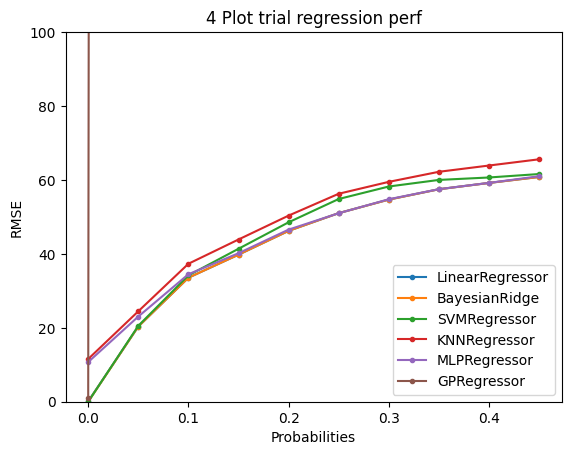

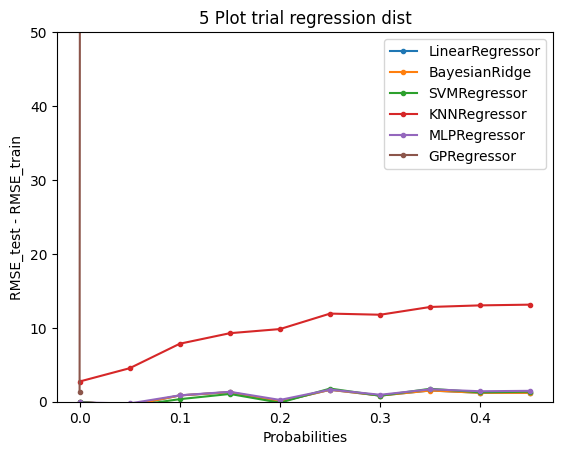

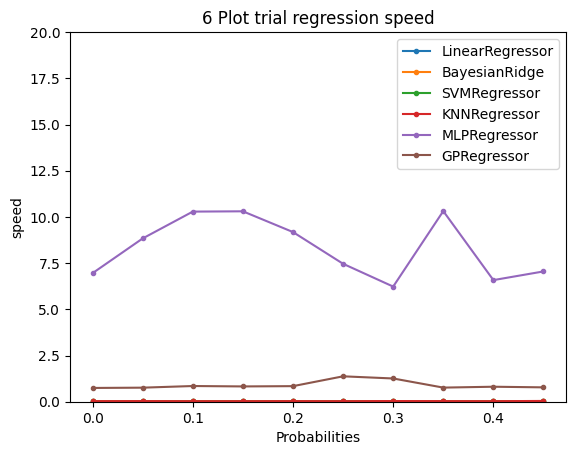

In [ ]:
# Regression and results
full = []
for df in created_datasets:
  full.append( df.to_numpy())

results_for_each_algorithm = []

for algorithm in REGRESSION_ALGORITHMS:  # FIRST CICLE ON THE ALGORITHMS

        results_single_algorithm = []

        for dd in full:
          results_2_analysis = regression(dd, y, algorithm, SEED)
          results_single_algorithm.append(results_2_analysis)

        results_for_each_algorithm.append(results_single_algorithm)

    # RESULTS EVALUATION
    # EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=probs1, x_label="Probabilities", results=results_for_each_algorithm,title="4 Plot trial regression perf", algorithms=REGRESSION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=probs1, x_label="Probabilities", results=results_for_each_algorithm,title="5 Plot trial regression dist", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=probs1, x_label="Probabilities", results=results_for_each_algorithm,title="6 Plot trial regression speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed")

## 3rd Experiment
MCAR simulation with iteration over

probabilities: probs2

### Error Injection

Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Tra

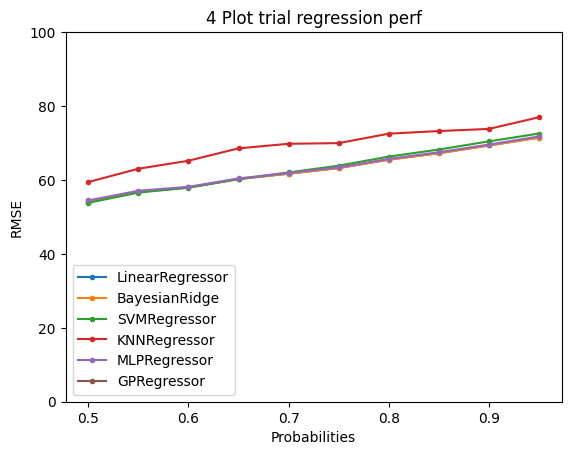

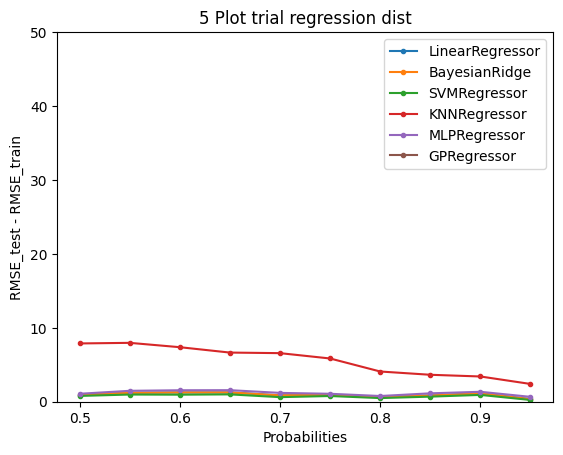

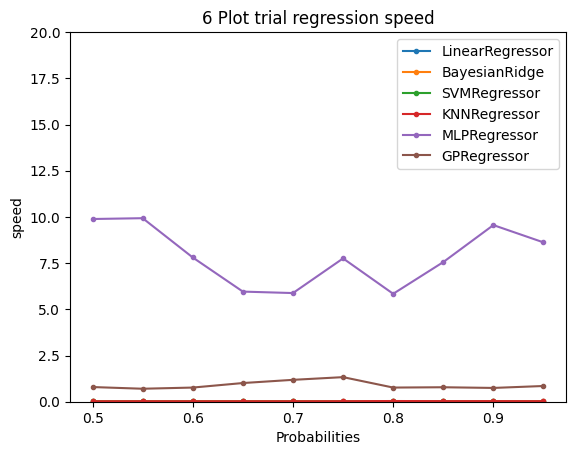

In [ ]:
results_for_each_algorithm = []
created_datasets = []
#MCAR simulation probs 2
for algorithm in REGRESSION_ALGORITHMS:  # FIRST CICLE ON THE ALGORITHMS

        results_single_algorithm = []

        for i in range(len(probs2)):
          mcar = simulateMCAR(X, probs2[i])
          if (algorithm == "LinearRegressor"):
            created_datasets.append(mcar)
          results_1_analysis = regression(mcar, y, algorithm, SEED)
          results_single_algorithm.append(results_1_analysis)

        results_for_each_algorithm.append(results_single_algorithm)

        # RESULTS EVALUATION
    # EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=probs2, x_label="Probabilities", results=results_for_each_algorithm,title="4 Plot trial regression perf", algorithms=REGRESSION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=probs2, x_label="Probabilities", results=results_for_each_algorithm,title="5 Plot trial regression dist", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=probs2, x_label="Probabilities", results=results_for_each_algorithm,title="6 Plot trial regression speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed")


### Data Imputation

In [ ]:
# First we convert the dataset from ndarray to dataframes
for i in range(len(created_datasets)):
  created_datasets[i] = pd.DataFrame(created_datasets[i])

In [ ]:
# Imputation with mean value
for df in created_datasets:
  df.fillna(df.mean(), inplace=True)

Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Tra

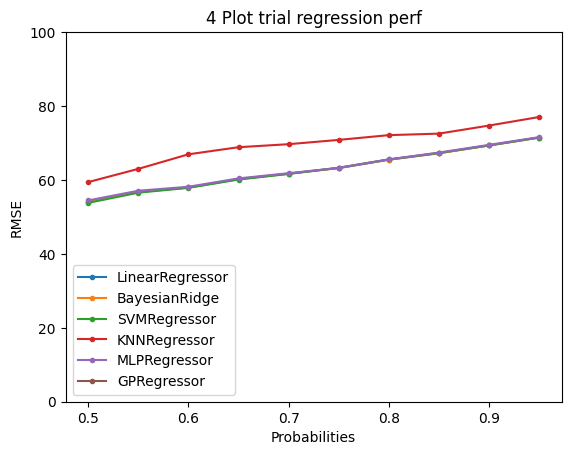

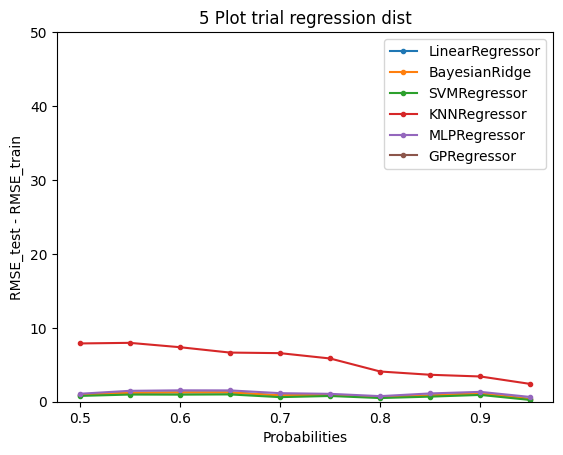

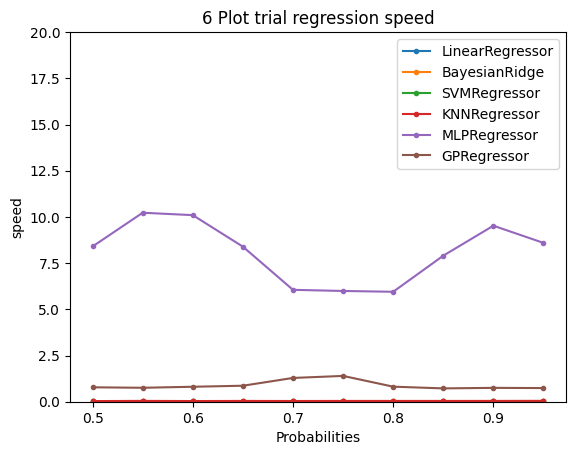

In [ ]:
# Regression and results
full = []
for df in created_datasets:
  full.append(df.to_numpy())

results_for_each_algorithm = []

for algorithm in REGRESSION_ALGORITHMS:  # FIRST CICLE ON THE ALGORITHMS

        results_single_algorithm = []

        for dd in full:
          results_2_analysis = regression(dd, y, algorithm, SEED)
          results_single_algorithm.append(results_2_analysis)

        results_for_each_algorithm.append(results_single_algorithm)

    # RESULTS EVALUATION
    # EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=probs2, x_label="Probabilities", results=results_for_each_algorithm,title="4 Plot trial regression perf", algorithms=REGRESSION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=probs2, x_label="Probabilities", results=results_for_each_algorithm,title="5 Plot trial regression dist", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=probs2, x_label="Probabilities", results=results_for_each_algorithm,title="6 Plot trial regression speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed")

## 4th Experiment
MNAR simulation over only the feature on column 2

The threshold is fixed as percentile_thresholds[5] which corresponds to the median value

We iterate over probabilities: probs1

### Error Injection

Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Tra

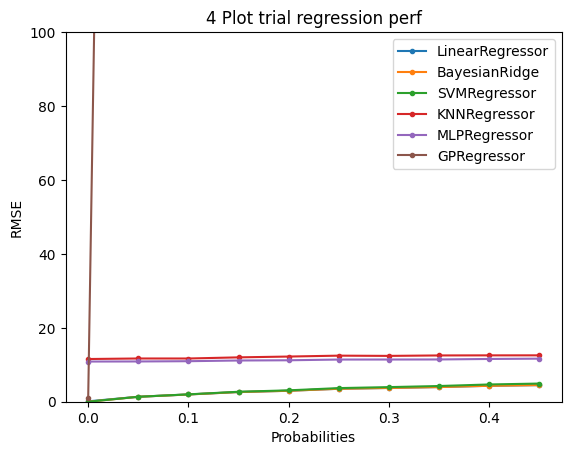

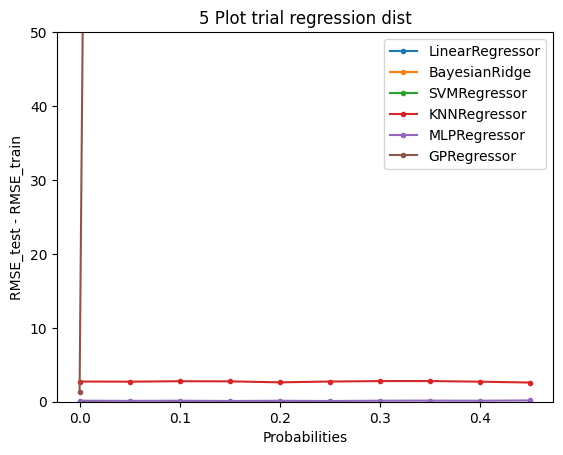

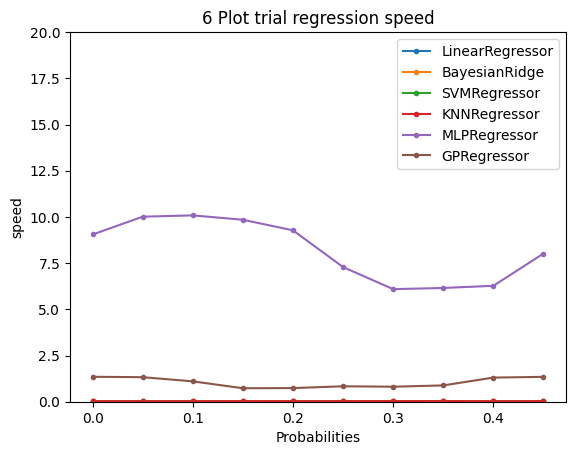

In [ ]:
#MNAR one column
results_for_each_algorithm = []
created_datasets = []
#MNAR simulation with fixed threshold and varying probability (probs1)
for algorithm in REGRESSION_ALGORITHMS:  # FIRST CICLE ON THE ALGORITHMS

    results_single_algorithm = []

    for i in range(len(probs1)):
        #quartiles[5] means that it should eliminate values bigger than around the 50% of values
        #the selected feature to simulate is the second one in this case
        mcar = simulateMNAROneColumn(X, percentile_thresholds[5], probs1[i], 1)
        if (algorithm == "LinearRegressor"):
            created_datasets.append(mcar)

        results_1_analysis = regression(mcar, y, algorithm, SEED)
        results_single_algorithm.append(results_1_analysis)

    results_for_each_algorithm.append(results_single_algorithm)

        # RESULTS EVALUATION
    # EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=probs1, x_label="Probabilities", results=results_for_each_algorithm,title="4 Plot trial regression perf", algorithms=REGRESSION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=probs1, x_label="Probabilities", results=results_for_each_algorithm,title="5 Plot trial regression dist", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=probs1, x_label="Probabilities", results=results_for_each_algorithm,title="6 Plot trial regression speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed")


### Data Imputation

In [ ]:
# First we convert the dataset from ndarray to dataframes
for i in range(len(created_datasets)):
  created_datasets[i] = pd.DataFrame(created_datasets[i])
  created_datasets[i].columns = created_datasets[i].columns.map(str) #convert columns name from integer to strings

In [ ]:
# Imputation with KNNImputer
missing_columns = ['1']

In [ ]:
datasets_copy = []
IMPUTER = KNNImputer(n_neighbors=5)

for df in created_datasets:
  datasets_copy.append(df.copy())

for i in range(len(datasets_copy)):
  datasets_copy[i] = pd.DataFrame(IMPUTER.fit_transform(df))


Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Tra

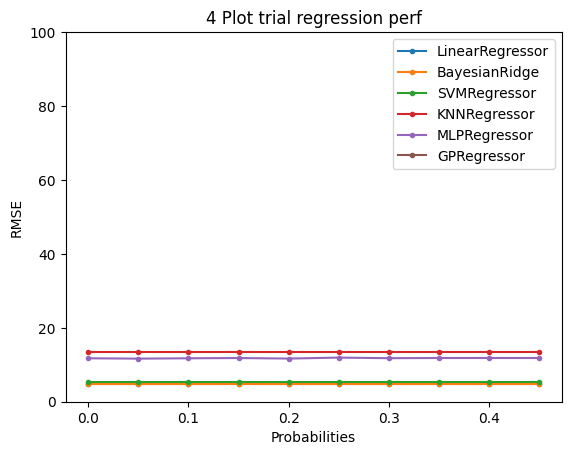

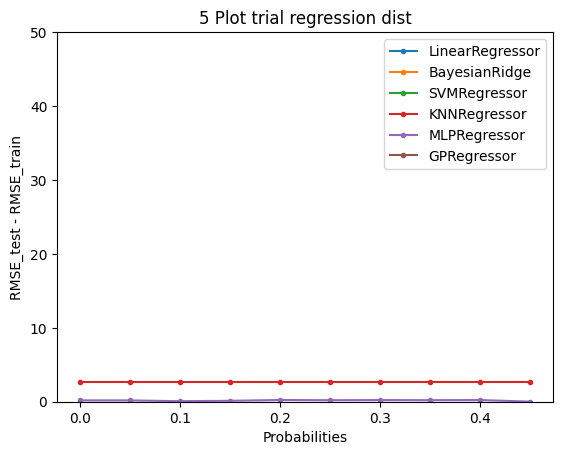

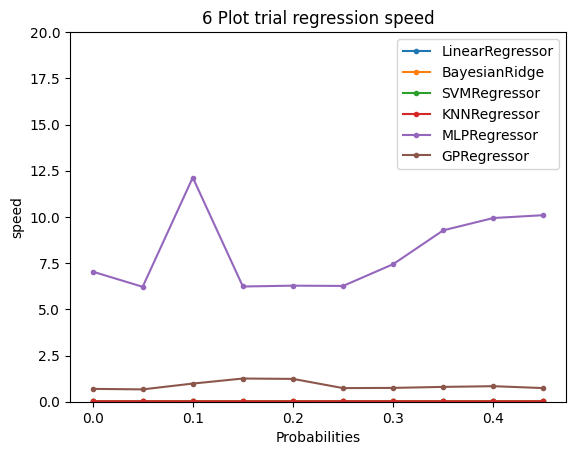

In [ ]:
# Regression and results
full=[]
for df in datasets_copy:
  full.append(df.to_numpy())

results_for_each_algorithm = []

for algorithm in REGRESSION_ALGORITHMS:  # FIRST CICLE ON THE ALGORITHMS

        results_single_algorithm = []

        for dd in full:
          results_2_analysis = regression(dd, y, algorithm, SEED)
          results_single_algorithm.append(results_2_analysis)

        results_for_each_algorithm.append(results_single_algorithm)

    # RESULTS EVALUATION
    # EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=probs1, x_label="Probabilities", results=results_for_each_algorithm,title="4 Plot trial regression perf", algorithms=REGRESSION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=probs1, x_label="Probabilities", results=results_for_each_algorithm,title="5 Plot trial regression dist", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=probs1, x_label="Probabilities", results=results_for_each_algorithm,title="6 Plot trial regression speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed")

## 5th Experiment
MCAR injection over the non-informative column

Iteration over probabilities: probs2

### Error Injection

In [ ]:
# Recreate dataset with a non informative column, we set shuffle to False to be able to get the index of the non informative column
X, y = make_dataset_for_regression(n_samples=1000, n_features=4, n_informative=3, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, seed=SEED, shuffle=False)

Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Tra

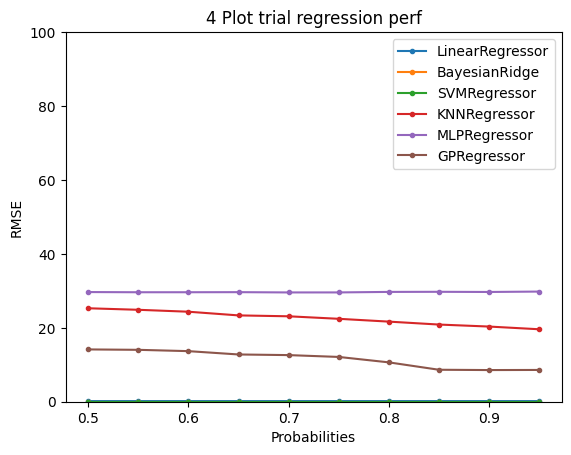

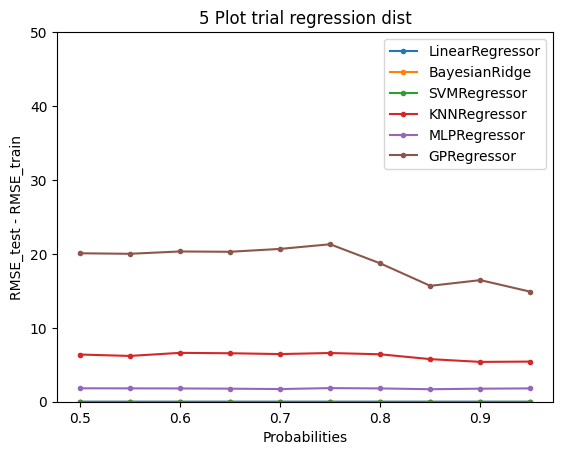

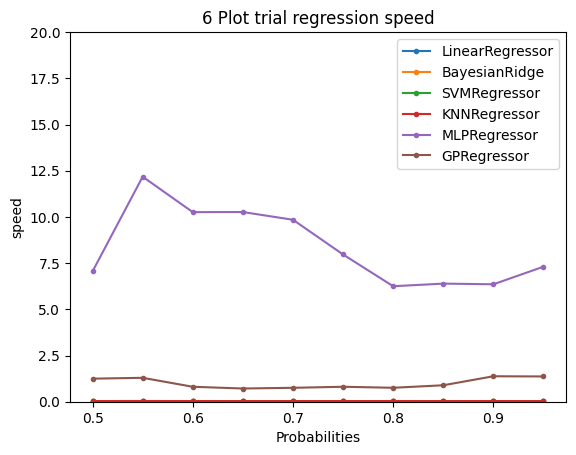

In [ ]:
results_for_each_algorithm = []
created_datasets = []

for algorithm in REGRESSION_ALGORITHMS:  # FIRST CICLE ON THE ALGORITHMS

    results_single_algorithm = []

    for i in range(len(probs4)):
        # using probs2 since it has the higher probabilities
        mcar = simulateMCAROneColumn(X, probs2[i], 3)
        if (algorithm == "LinearRegressor"):
            created_datasets.append(mcar)

        results_1_analysis = regression(mcar, y, algorithm, SEED)
        results_single_algorithm.append(results_1_analysis)

    results_for_each_algorithm.append(results_single_algorithm)

# RESULTS EVALUATION
plot(x_axis_values=probs2, x_label="Probabilities", results=results_for_each_algorithm,title="4 Plot trial regression perf", algorithms=REGRESSION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=probs2, x_label="Probabilities", results=results_for_each_algorithm,title="5 Plot trial regression dist", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=probs2, x_label="Probabilities", results=results_for_each_algorithm,title="6 Plot trial regression speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed")


### Data Imputation

In [ ]:
# Imputation with SimpleImputer (strategy median)
SI = SimpleImputer(missing_values=np.NaN, strategy='median')

for df in created_datasets:
  df = SI.fit_transform(df)


Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Tra

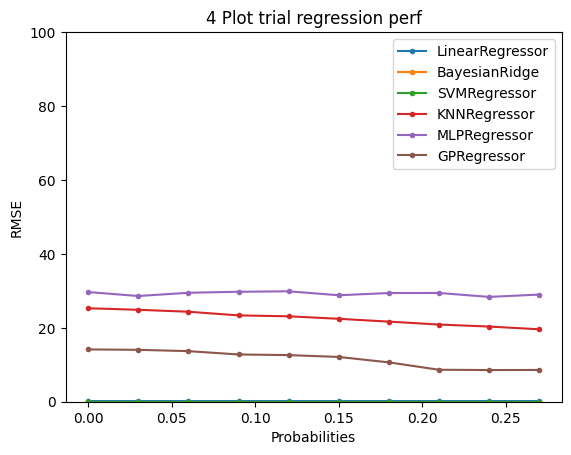

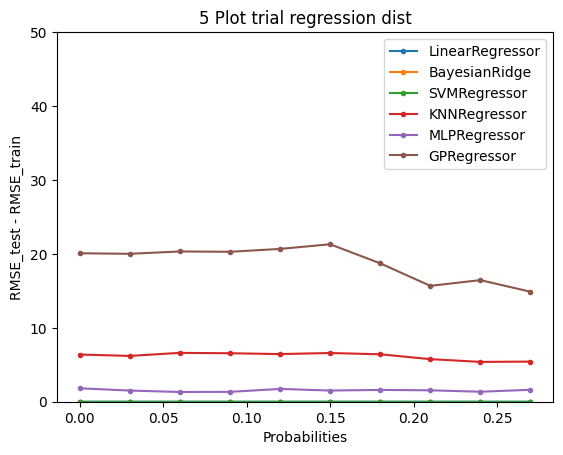

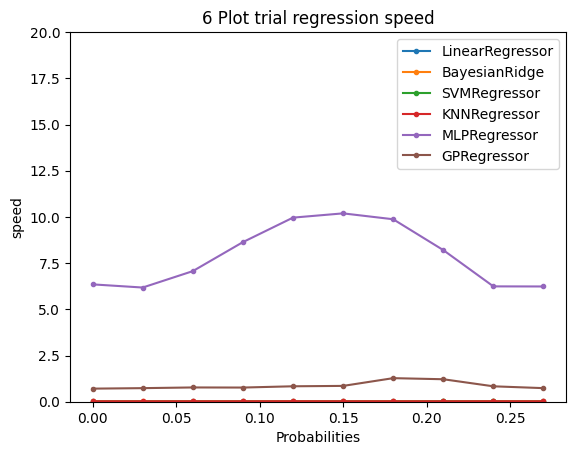

In [ ]:
# Regression and results
full=[]
for df in created_datasets:
  full.append(df)

results_for_each_algorithm = []

for algorithm in REGRESSION_ALGORITHMS:  # FIRST CICLE ON THE ALGORITHMS

        results_single_algorithm = []

        for dd in full:
          results_2_analysis = regression(dd, y, algorithm, SEED)
          results_single_algorithm.append(results_2_analysis)

        results_for_each_algorithm.append(results_single_algorithm)

    # RESULTS EVALUATION
    # EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=probs4, x_label="Probabilities", results=results_for_each_algorithm,title="4 Plot trial regression perf", algorithms=REGRESSION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=probs4, x_label="Probabilities", results=results_for_each_algorithm,title="5 Plot trial regression dist", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=probs4, x_label="Probabilities", results=results_for_each_algorithm,title="6 Plot trial regression speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed")

## 6th Experiment

MNAR simulation over one feature (still the second feature) with a fixed probabilities of missing (35%) and a varying threshold (percentile_thresholds)

### Error Injection

Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Tra

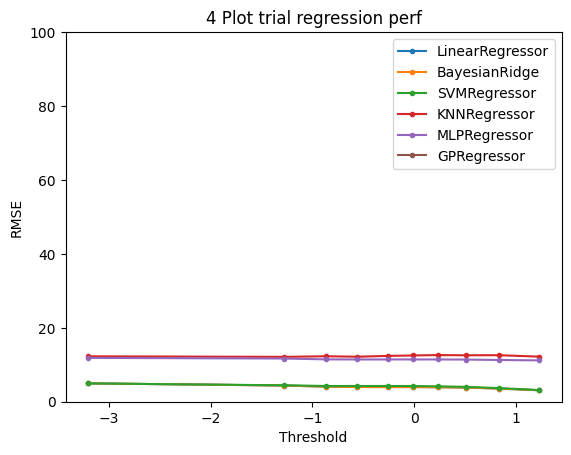

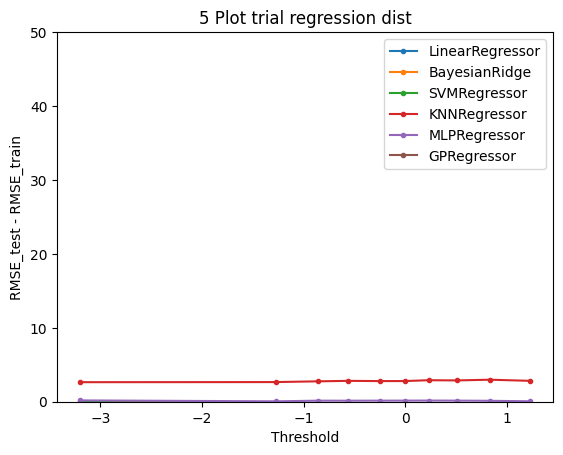

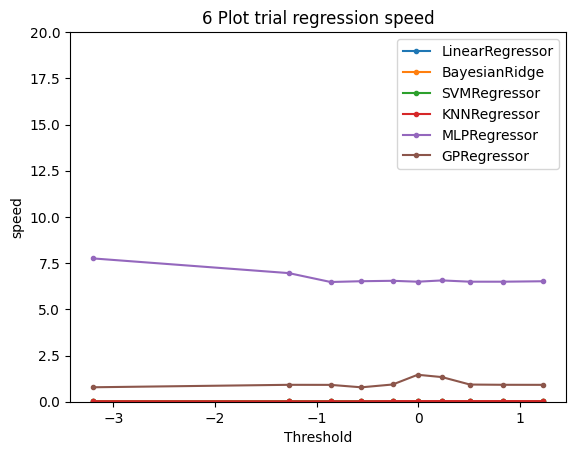

In [4]:
#MNAR one column, fixed probability and varying threshold (probs1), soglie giuste
results_for_each_algorithm = []
created_datasets = []
#MNAR simulation with fixed threshold and varying probability
for algorithm in REGRESSION_ALGORITHMS:  # FIRST CICLE ON THE ALGORITHMS

    results_single_algorithm = []

    for i in range(0, len(percentile_thresholds)):
      #the probability of missing is 35%
      #the selected feature to simulate is the second one in this case
      mcar = simulateMNAROneColumn(X, percentile_thresholds[i], probs1[7], 1)
      if (algorithm == "LinearRegressor"):
            created_datasets.append(mcar)

      results_1_analysis = regression(mcar, y, algorithm, SEED)
      results_single_algorithm.append(results_1_analysis)

    results_for_each_algorithm.append(results_single_algorithm)

        # RESULTS EVALUATION
    # EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=percentile_thresholds, x_label="Threshold", results=results_for_each_algorithm,title="4 Plot trial regression perf", algorithms=REGRESSION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=percentile_thresholds, x_label="Threshold", results=results_for_each_algorithm,title="5 Plot trial regression dist", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=percentile_thresholds, x_label="Threshold", results=results_for_each_algorithm,title="6 Plot trial regression speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed")


### Data Imputation

In [5]:
# First we convert the dataset from ndarray to dataframes
for i in range(len(created_datasets)):
  created_datasets[i] = pd.DataFrame(created_datasets[i])
  created_datasets[i].columns = created_datasets[i].columns.map(str) #convert columns name from integer to strings

In [6]:
# Imputation with Linear Regression
missing_column = '1'

In [7]:
# Function taken from https://github.com/camillasancricca/DATADIQ/blob/main/scripts_for_E5.py

def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    return df

In [8]:
for df in created_datasets:
    df[missing_column + '_imp'] = df[missing_column]
    df = random_imputation(df, missing_column)

In [10]:
imputated_datasets = []

for df in created_datasets:
  IMP_DATA = pd.DataFrame(columns = ["IMP" + missing_column])
  IMP_DATA['IMP' + missing_column] = df[missing_column]
  parameters = list(set(df.columns) - set(missing_column) - {missing_column + '_imp'} )

  #Create a Linear Regression model to estimate the missing data
  model = linear_model.LinearRegression()
  model.fit(X = df[parameters], y = df[missing_column + '_imp'])
  model_predicted = model.predict(df[parameters])

  #observe that I preserve the index of the missing data from the original dataframe
  print("IMP" + missing_column + " successfully imputed")
  IMP_DATA.loc[df[missing_column].isnull(), "IMP" + missing_column] = model_predicted[df[missing_column].isnull()]
  imputated_datasets.append(IMP_DATA)

IMP1 successfully imputed
IMP1 successfully imputed
IMP1 successfully imputed
IMP1 successfully imputed
IMP1 successfully imputed
IMP1 successfully imputed
IMP1 successfully imputed
IMP1 successfully imputed
IMP1 successfully imputed
IMP1 successfully imputed


In [12]:
for i,df in enumerate(created_datasets):
  df[missing_column] = imputated_datasets[i]['IMP' + missing_column]
  df.drop(columns= missing_column + '_imp', inplace=True)

Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Tra

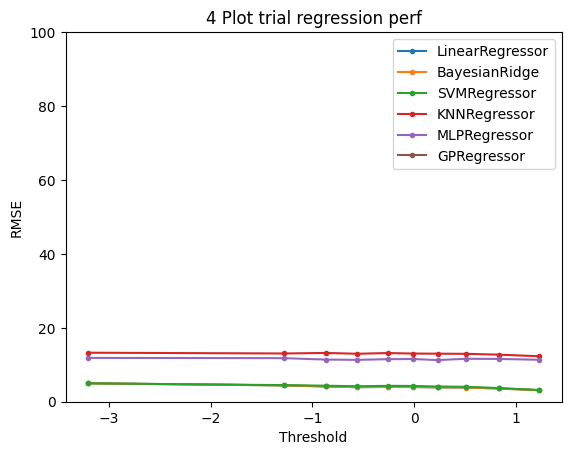

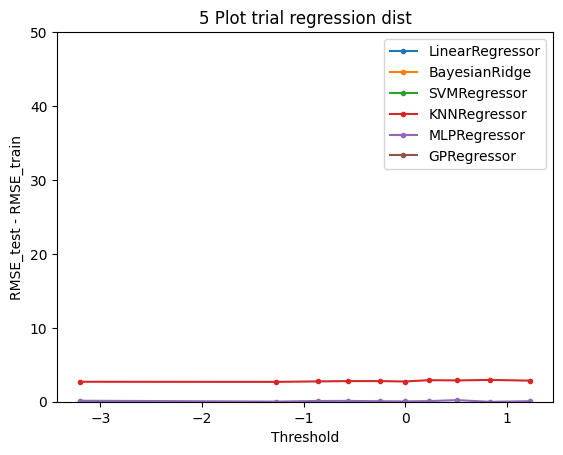

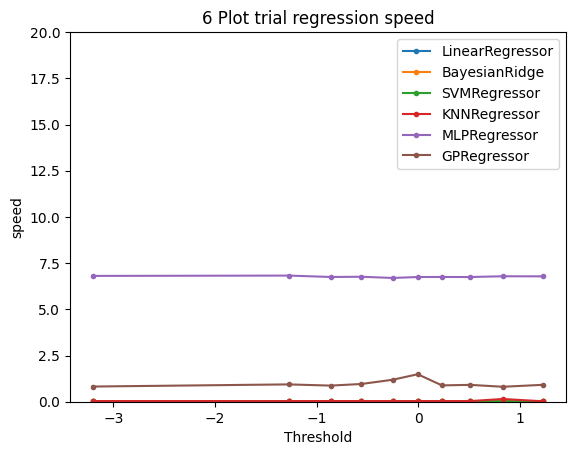

In [13]:
# Regression and results
full=[]
for df in created_datasets:
  full.append(df)

results_for_each_algorithm = []

for algorithm in REGRESSION_ALGORITHMS:  # FIRST CICLE ON THE ALGORITHMS

        results_single_algorithm = []

        for dd in full:
          results_2_analysis = regression(dd, y, algorithm, SEED)
          results_single_algorithm.append(results_2_analysis)

        results_for_each_algorithm.append(results_single_algorithm)

    # RESULTS EVALUATION
    # EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=percentile_thresholds, x_label="Threshold", results=results_for_each_algorithm,title="4 Plot trial regression perf", algorithms=REGRESSION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=percentile_thresholds, x_label="Threshold", results=results_for_each_algorithm,title="5 Plot trial regression dist", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=percentile_thresholds, x_label="Threshold", results=results_for_each_algorithm,title="6 Plot trial regression speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed")

## 7th Experiment

MNAR simulation over one feature (now the third feature) with a fixed probabilities of missing (85%) and a varying threshold (percentile_thresholds)

### Error Injection

Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Tra

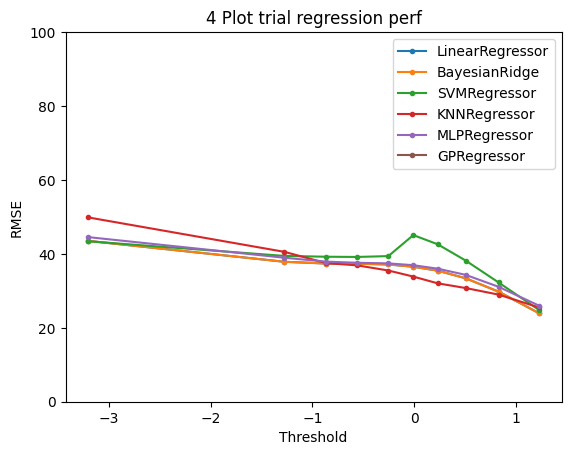

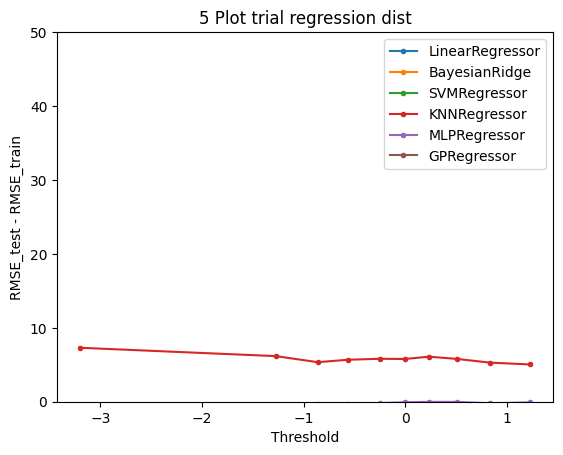

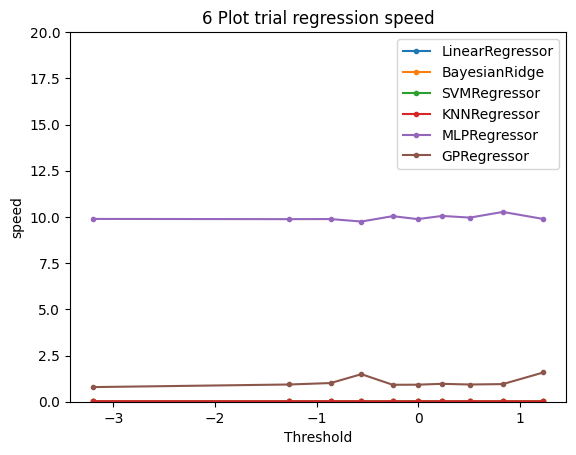

In [14]:
#MNAR one column, fixed probability and varying threshold (probs2), soglie giuste
results_for_each_algorithm = []
created_datasets = []
#MNAR simulation with fixed threshold and varying probability
for algorithm in REGRESSION_ALGORITHMS:  # FIRST CICLE ON THE ALGORITHMS

    results_single_algorithm = []

    for i in range(0, len(percentile_thresholds)):
      #the probability of missing is 85%
      #the selected feature to simulate is the second one in this case
      mcar = simulateMNAROneColumn(X, percentile_thresholds[i], probs2[7], 2)
      if (algorithm == "LinearRegressor"):
            created_datasets.append(mcar)

      results_1_analysis = regression(mcar, y, algorithm, SEED)
      results_single_algorithm.append(results_1_analysis)

    results_for_each_algorithm.append(results_single_algorithm)

        # RESULTS EVALUATION
    # EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=percentile_thresholds, x_label="Threshold", results=results_for_each_algorithm,title="4 Plot trial regression perf", algorithms=REGRESSION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=percentile_thresholds, x_label="Threshold", results=results_for_each_algorithm,title="5 Plot trial regression dist", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=percentile_thresholds, x_label="Threshold", results=results_for_each_algorithm,title="6 Plot trial regression speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed")


### Data Imputation

In [15]:
# First we convert the dataset from ndarray to dataframes
for i in range(len(created_datasets)):
  created_datasets[i] = pd.DataFrame(created_datasets[i])

In [16]:
for df in created_datasets:
  df[2].fillna(df[2].std())

Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Tra

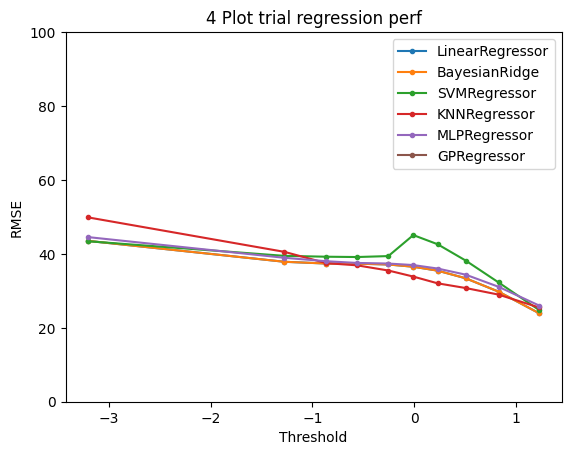

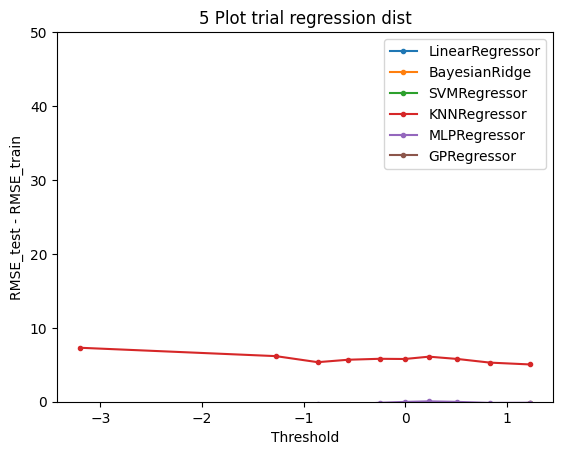

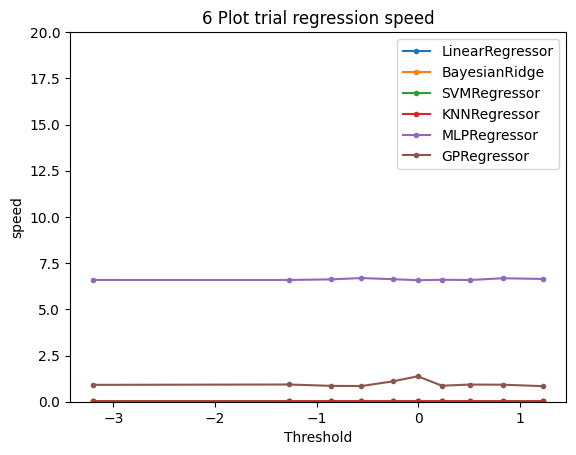

In [17]:
# Regression and results
full=[]
for df in created_datasets:
  full.append(df)

results_for_each_algorithm = []

for algorithm in REGRESSION_ALGORITHMS:  # FIRST CICLE ON THE ALGORITHMS

        results_single_algorithm = []

        for dd in full:
          results_2_analysis = regression(dd, y, algorithm, SEED)
          results_single_algorithm.append(results_2_analysis)

        results_for_each_algorithm.append(results_single_algorithm)

    # RESULTS EVALUATION
    # EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=percentile_thresholds, x_label="Threshold", results=results_for_each_algorithm,title="4 Plot trial regression perf", algorithms=REGRESSION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=percentile_thresholds, x_label="Threshold", results=results_for_each_algorithm,title="5 Plot trial regression dist", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=percentile_thresholds, x_label="Threshold", results=results_for_each_algorithm,title="6 Plot trial regression speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed")

## 8th Experiment

MNAR simulation over one feature (now the first feature) with a fixed probabilities of missing (35%) and a varying threshold (random_thresholds)

### Error Injection

Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Tra

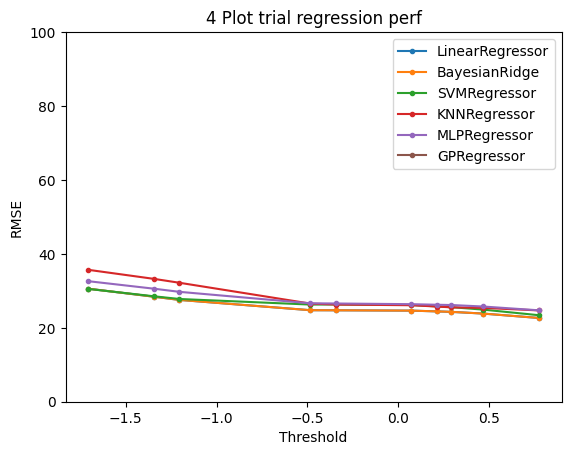

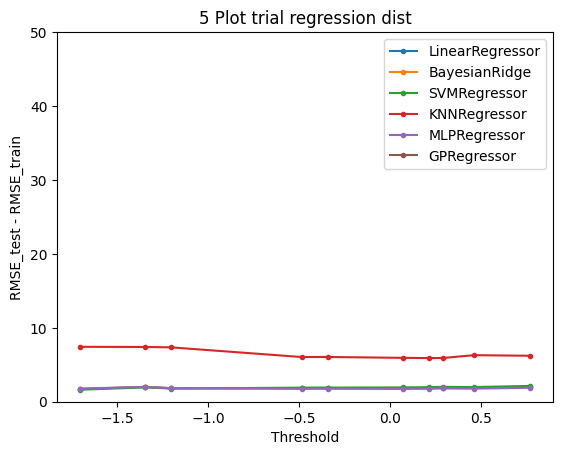

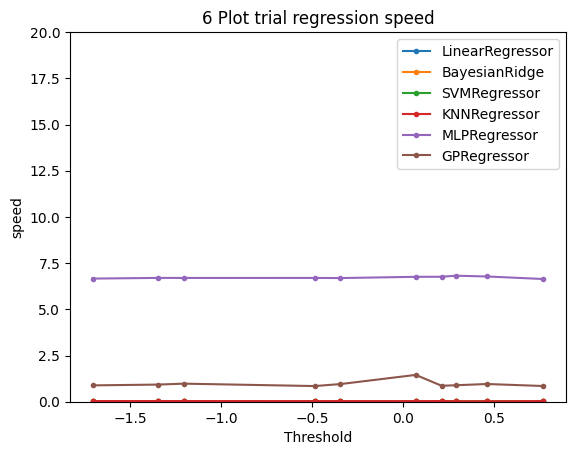

In [18]:
#MNAR one column, fixed probability and varying threshold (probs1), soglie randomice
results_for_each_algorithm = []
created_datasets = []
#MNAR simulation with fixed threshold and varying probability
for algorithm in REGRESSION_ALGORITHMS:  # FIRST CICLE ON THE ALGORITHMS

    results_single_algorithm = []

    for i in range(0, len(random_thresholds)):
      #the probability of missing is 35%
      #the selected feature to simulate is the second one in this case
      mcar = simulateMNAROneColumn(X, random_thresholds[i], probs1[7], 0)
      if (algorithm == "LinearRegressor"):
            created_datasets.append(mcar)

      results_1_analysis = regression(mcar, y, algorithm, SEED)
      results_single_algorithm.append(results_1_analysis)

    results_for_each_algorithm.append(results_single_algorithm)

        # RESULTS EVALUATION
    # EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=random_thresholds, x_label="Threshold", results=results_for_each_algorithm,title="4 Plot trial regression perf", algorithms=REGRESSION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=random_thresholds, x_label="Threshold", results=results_for_each_algorithm,title="5 Plot trial regression dist", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=random_thresholds, x_label="Threshold", results=results_for_each_algorithm,title="6 Plot trial regression speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed")


### Data Imputation

In [19]:
# First we convert the dataset from ndarray to dataframes
for i in range(len(created_datasets)):
  created_datasets[i] = pd.DataFrame(created_datasets[i])

In [20]:
# Imputation with ffill (propagate last valid observation to the next nan)
for df in created_datasets:
  df.fillna(method='bfill', inplace=True)

Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Tra

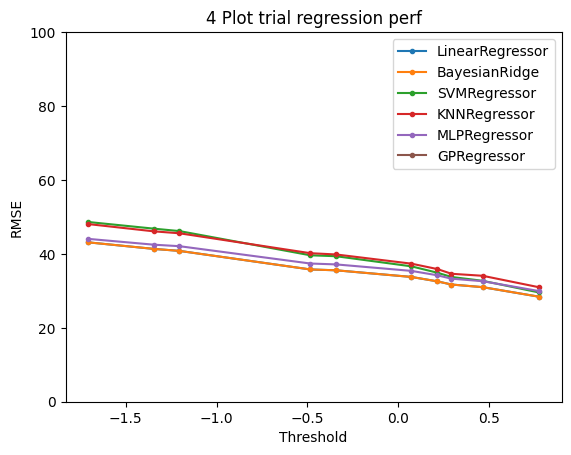

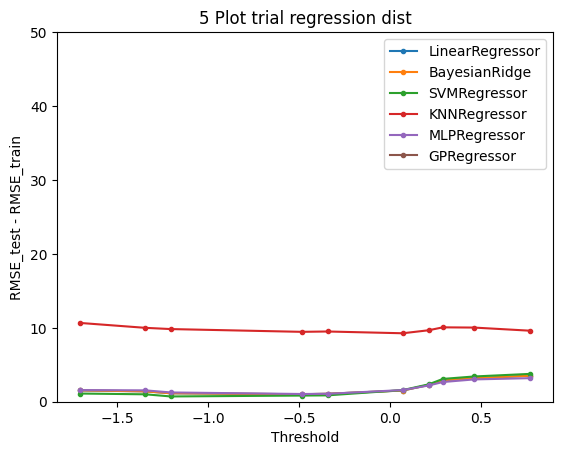

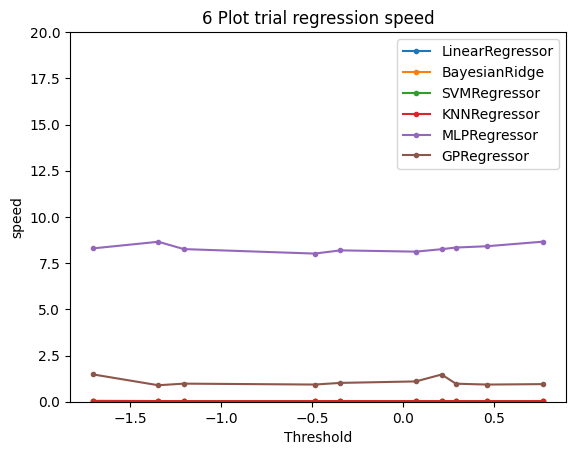

In [21]:
# Regression and results
full=[]
for df in created_datasets:
  full.append(df)

results_for_each_algorithm = []

for algorithm in REGRESSION_ALGORITHMS:  # FIRST CICLE ON THE ALGORITHMS

        results_single_algorithm = []

        for dd in full:
          results_2_analysis = regression(dd, y, algorithm, SEED)
          results_single_algorithm.append(results_2_analysis)

        results_for_each_algorithm.append(results_single_algorithm)

    # RESULTS EVALUATION
    # EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=random_thresholds, x_label="Threshold", results=results_for_each_algorithm,title="4 Plot trial regression perf", algorithms=REGRESSION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=random_thresholds, x_label="Threshold", results=results_for_each_algorithm,title="5 Plot trial regression dist", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=random_thresholds, x_label="Threshold", results=results_for_each_algorithm,title="6 Plot trial regression speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed")


## 9th Experiment

MCAR simulation over one feature (second feature) with varying probabilities (probs1)

### Error Injection

Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Tra

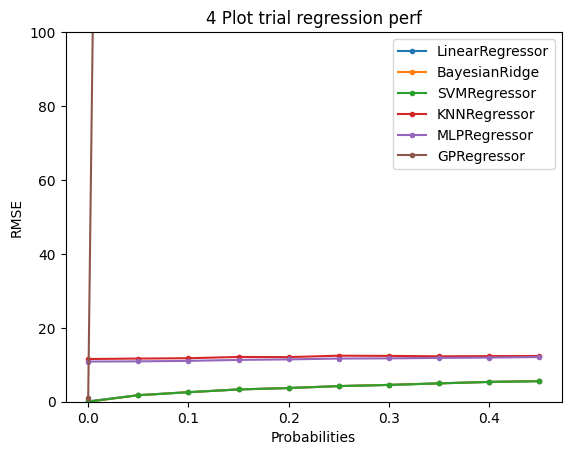

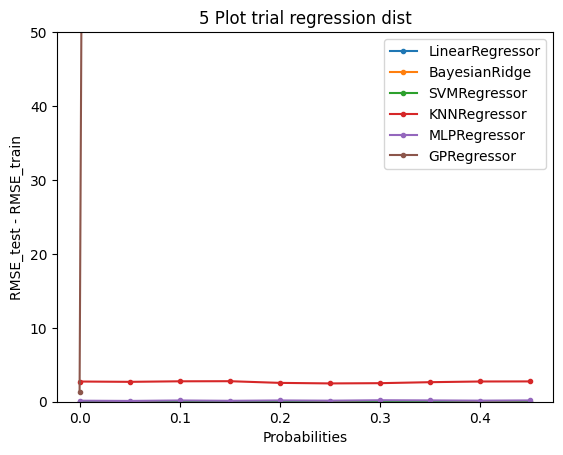

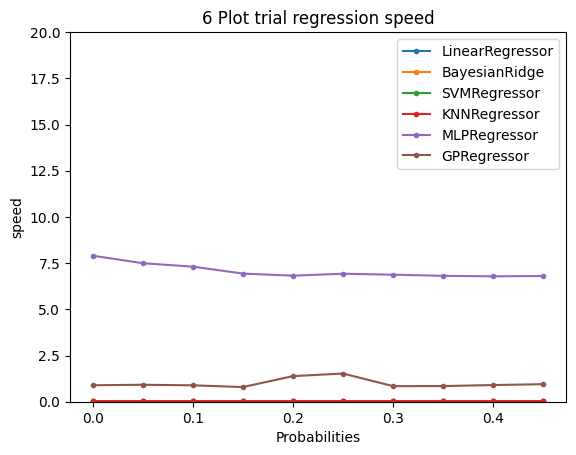

In [22]:
#MCAR one column (probs1)
results_for_each_algorithm = []
created_datasets = []
#MCAR simulation
for algorithm in REGRESSION_ALGORITHMS:  # FIRST CICLE ON THE ALGORITHMS

    results_single_algorithm = []

    for i in range(len(probs1)):
    #miss on feature 2 with varying probabilities
      mcar = simulateMCAROneColumn(X, probs1[i], 1)
      if (algorithm == "LinearRegressor"):
            created_datasets.append(mcar)
      results_1_analysis = regression(mcar, y, algorithm, SEED)
      results_single_algorithm.append(results_1_analysis)

    results_for_each_algorithm.append(results_single_algorithm)

        # RESULTS EVALUATION
    # EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=probs1, x_label="Probabilities", results=results_for_each_algorithm,title="4 Plot trial regression perf", algorithms=REGRESSION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=probs1, x_label="Probabilities", results=results_for_each_algorithm,title="5 Plot trial regression dist", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=probs1, x_label="Probabilities", results=results_for_each_algorithm,title="6 Plot trial regression speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed")


### Data Imputation

In [23]:
# First we convert the dataset from ndarray to dataframes
for i in range(len(created_datasets)):
  created_datasets[i] = pd.DataFrame(created_datasets[i])
  created_datasets[i].columns = created_datasets[i].columns.map(str) #convert columns name from integer to strings

In [24]:
# Imputation with KNNImputer
missing_columns = ['1']

In [25]:
datasets_copy = []
IMPUTER = KNNImputer(n_neighbors=5)

for df in created_datasets:
  datasets_copy.append(df.copy())

for i in range(len(datasets_copy)):
  datasets_copy[i] = pd.DataFrame(IMPUTER.fit_transform(df))


Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Tra

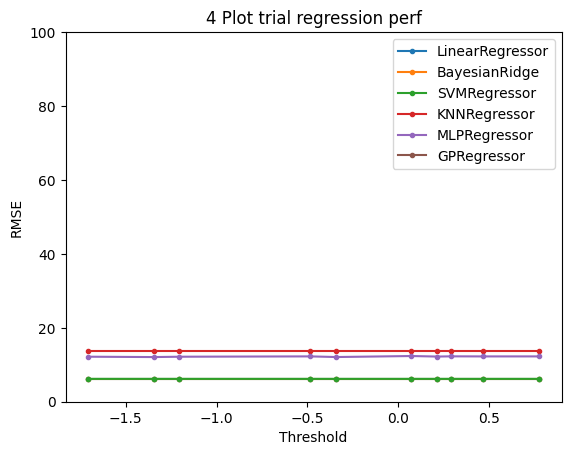

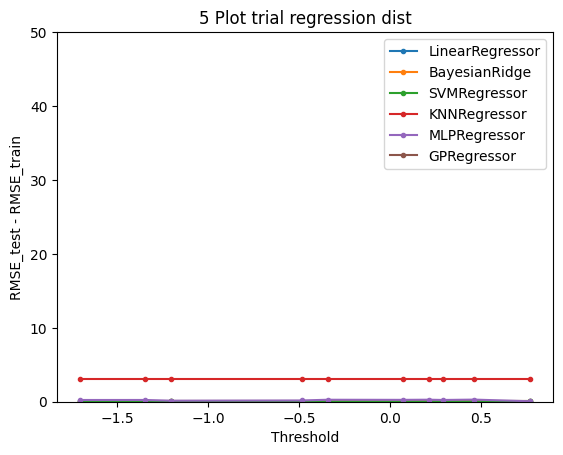

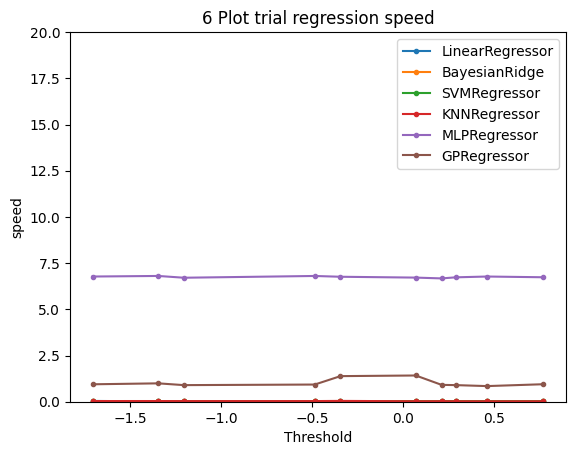

In [26]:
# Regression and results
full=[]
for df in datasets_copy:
  full.append(df)

results_for_each_algorithm = []

for algorithm in REGRESSION_ALGORITHMS:  # FIRST CICLE ON THE ALGORITHMS

        results_single_algorithm = []

        for dd in full:
          results_2_analysis = regression(dd, y, algorithm, SEED)
          results_single_algorithm.append(results_2_analysis)

        results_for_each_algorithm.append(results_single_algorithm)

    # RESULTS EVALUATION
    # EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=random_thresholds, x_label="Threshold", results=results_for_each_algorithm,title="4 Plot trial regression perf", algorithms=REGRESSION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=random_thresholds, x_label="Threshold", results=results_for_each_algorithm,title="5 Plot trial regression dist", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=random_thresholds, x_label="Threshold", results=results_for_each_algorithm,title="6 Plot trial regression speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed")


## 10th Experiment

MCAR simulation over one column (also second column) with varying probabilities (probs3)

### Error Injection

Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Tra

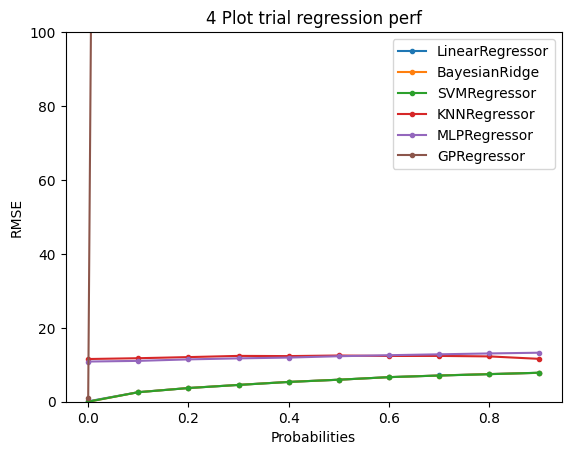

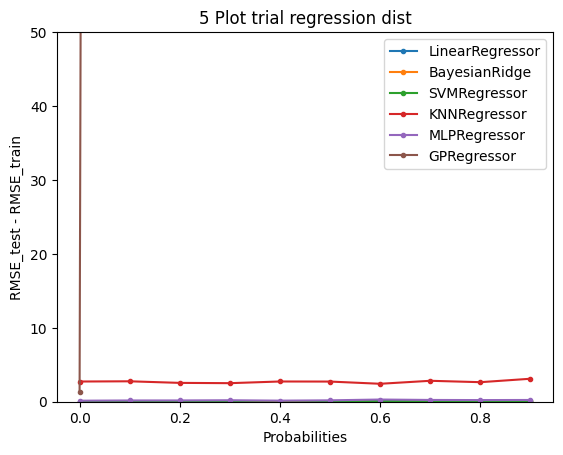

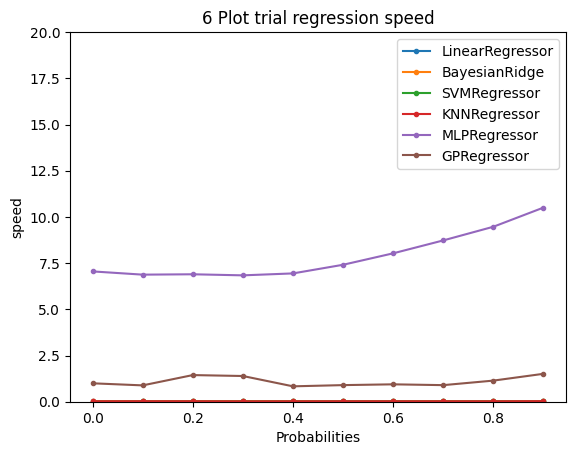

In [27]:
#MCAR one column (probs3)
results_for_each_algorithm = []
created_datasets = []
#MCAR simulation
for algorithm in REGRESSION_ALGORITHMS:  # FIRST CICLE ON THE ALGORITHMS

    results_single_algorithm = []

    for i in range(len(probs3)):
    #miss on feature 2 with varying probabilities
      mcar = simulateMCAROneColumn(X, probs3[i], 1)
      if (algorithm == "LinearRegressor"):
            created_datasets.append(mcar)

      results_1_analysis = regression(mcar, y, algorithm, SEED)
      results_single_algorithm.append(results_1_analysis)

    results_for_each_algorithm.append(results_single_algorithm)

        # RESULTS EVALUATION
    # EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=probs3, x_label="Probabilities", results=results_for_each_algorithm,title="4 Plot trial regression perf", algorithms=REGRESSION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=probs3, x_label="Probabilities", results=results_for_each_algorithm,title="5 Plot trial regression dist", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=probs3, x_label="Probabilities", results=results_for_each_algorithm,title="6 Plot trial regression speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed")


### Data Imputation

In [28]:
# First we convert the dataset from ndarray to dataframes
for i in range(len(created_datasets)):
  created_datasets[i] = pd.DataFrame(created_datasets[i])
  created_datasets[i].columns = created_datasets[i].columns.map(str) #convert columns name from integer to strings

In [29]:
# Imputation with Linear Regression
missing_column = '1'

In [30]:
# Function taken from https://github.com/camillasancricca/DATADIQ/blob/main/scripts_for_E5.py

def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    return df

In [31]:
for df in created_datasets:
    df[missing_column + '_imp'] = df[missing_column]
    df = random_imputation(df, missing_column)

In [32]:
imputated_datasets = []

for df in created_datasets:
  IMP_DATA = pd.DataFrame(columns = ["IMP" + missing_column])
  IMP_DATA['IMP' + missing_column] = df[missing_column]
  parameters = list(set(df.columns) - set(missing_column) - {missing_column + '_imp'} )

  #Create a Linear Regression model to estimate the missing data
  model = linear_model.LinearRegression()
  model.fit(X = df[parameters], y = df[missing_column + '_imp'])
  model_predicted = model.predict(df[parameters])

  #observe that I preserve the index of the missing data from the original dataframe
  print("IMP" + missing_column + " successfully imputed")
  IMP_DATA.loc[df[missing_column].isnull(), "IMP" + missing_column] = model_predicted[df[missing_column].isnull()]
  imputated_datasets.append(IMP_DATA)

IMP1 successfully imputed
IMP1 successfully imputed
IMP1 successfully imputed
IMP1 successfully imputed
IMP1 successfully imputed
IMP1 successfully imputed
IMP1 successfully imputed
IMP1 successfully imputed
IMP1 successfully imputed
IMP1 successfully imputed


In [33]:
for i,df in enumerate(created_datasets):
  df[missing_column] = imputated_datasets[i]['IMP' + missing_column]
  df.drop(columns= missing_column + '_imp', inplace=True)

Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Training for KNNRegressor...
Tra

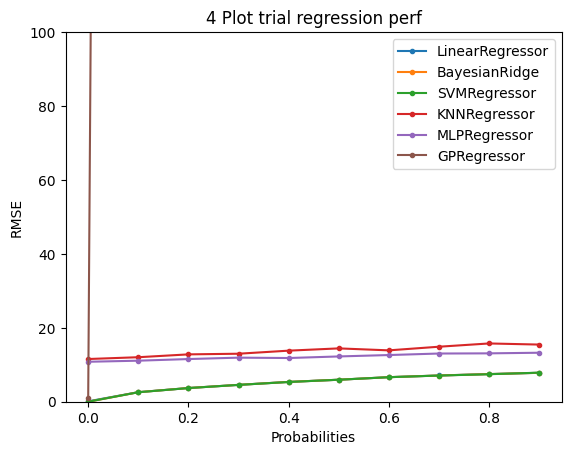

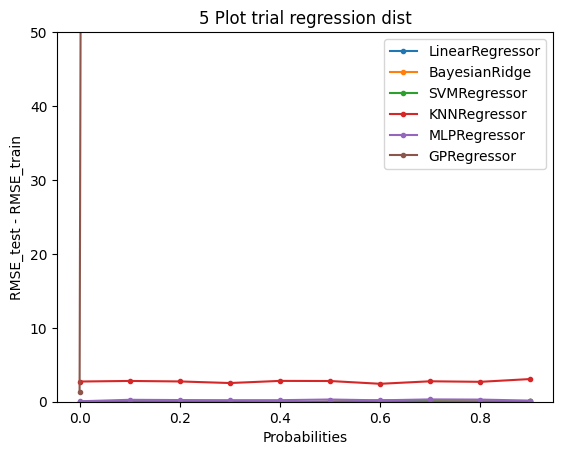

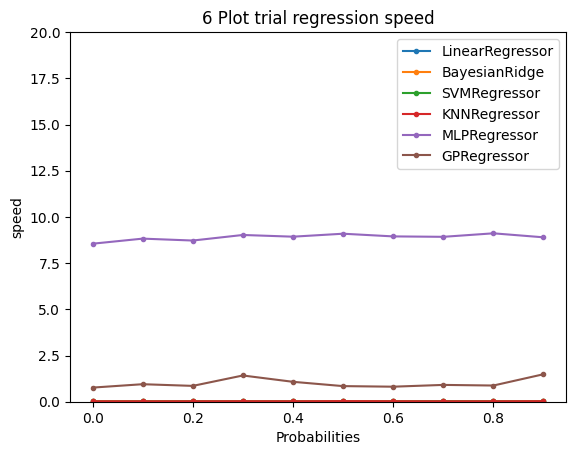

In [34]:
# Regression and results
full=[]
for df in created_datasets:
  full.append(df)

results_for_each_algorithm = []

for algorithm in REGRESSION_ALGORITHMS:  # FIRST CICLE ON THE ALGORITHMS

        results_single_algorithm = []

        for dd in full:
          results_2_analysis = regression(dd, y, algorithm, SEED)
          results_single_algorithm.append(results_2_analysis)

        results_for_each_algorithm.append(results_single_algorithm)

    # RESULTS EVALUATION
    # EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=probs3, x_label="Probabilities", results=results_for_each_algorithm,title="4 Plot trial regression perf", algorithms=REGRESSION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=probs3, x_label="Probabilities", results=results_for_each_algorithm,title="5 Plot trial regression dist", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=probs3, x_label="Probabilities", results=results_for_each_algorithm,title="6 Plot trial regression speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed")
